In [1]:
import requests
from PIL import Image
import numpy as np
import cv2
import base64
import json

def image_to_base64(image_np:np.ndarray):
    image_cv2_encoded = cv2.imencode('.png',image_np)[1]
    image_base64:str = str(base64.b64encode(image_cv2_encoded))[2:-1]
    return image_base64

def base64_to_image(image_base64:str):
    image_cv2_encoded:str = base64.b64decode(image_base64)
    nparry:np.array = np.frombuffer(image_cv2_encoded, np.uint8)
    image_np:np.array = cv2.imdecode(nparry, cv2.IMREAD_COLOR)
    return  image_np

def show_image_np(image_np:np.array, height, width):
    pil_image = Image.fromarray(np.uint8(image_np))
    pil_image = pil_image.resize((w, h))
    pil_image.show()
    return pil_image

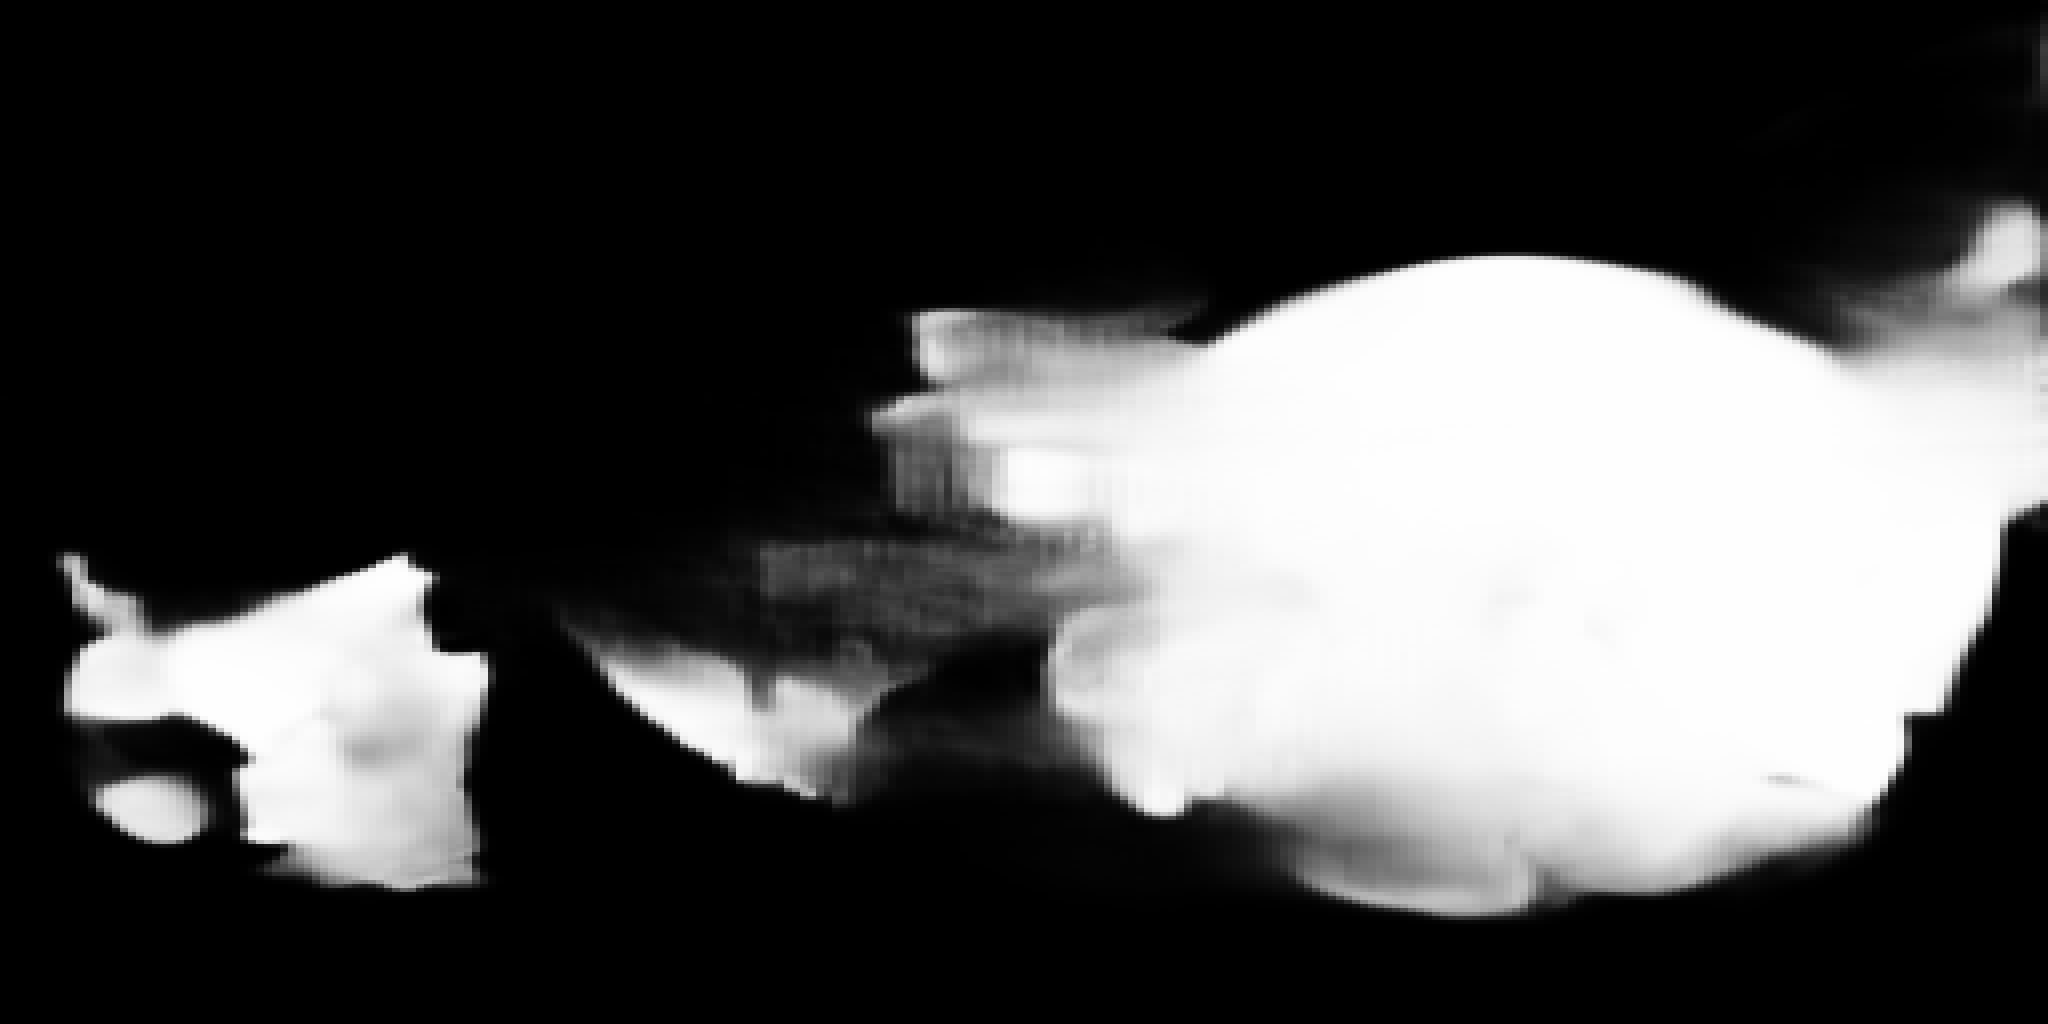

In [43]:
test_photo_path = "./stimulis/002.png"
predict_url = "http://127.0.0.1:5000/predict"

frame_np_BGR:np.ndarray = cv2.imread(test_photo_path)
h, w = frame_np_BGR.shape[0],frame_np_BGR.shape[1]
frame_np_RGB = cv2.cvtColor(frame_np_BGR, cv2.COLOR_BGR2RGB)

frame_base64:str = image_to_base64(frame_np_RGB)

payload:dict = {"image": frame_base64}
response = requests.get(predict_url, data=json.dumps(payload))

response_json:dict = json.loads(response.text)
mask_base64:str

mask_base64:str = response_json["mask"]
mask = base64_to_image(mask_base64)

show_image_np(mask, h, w)